<a href="https://colab.research.google.com/github/dest18/Prueba_Codigo_CV/blob/main/precid_tmp_operativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODE TO EXTRACT PRECIPITATION & TEMPERATURE OF PERU'S DISTRITCS
- INPUT: East Anglia University Climate Unit precipitation and temperature data (.5° by .5° grid worldwide)
- OUTPUT: SPI (Standard Precipitation Index) y STI (Standard Temperature Index) yearly

LINK COLAB: https://colab.research.google.com/drive/1vAkYt-VTy8y68K5lvufzDuvMpUH0NbaA?usp=sharing


# 1. Install & Import packages

## Install packages

In [ ]:
pip install rasterstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 14.9 MB/s eta 0:00:00


In [ ]:
pip install rioxarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 34.1 MB/s eta 0:00:00


In [ ]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install netcdf4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.2 MB/s eta 0:00:00


In [ ]:
pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 56.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.1 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102742 sha256=9492de0eacc757159eef8f8bc6c8fb1aecb36611b7fa4f8ae9cb9a187349742b
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [ ]:
pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 46.2 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0


In [ ]:
pip install cftime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.6 MB/s eta 0:00:00


## Import packages

In [ ]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import gzip
import shutil
import requests
import xarray as xr
#import cartopy.feature as cfeature
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile
import rasterio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gzip

# 2. Download & Import NC file and shapefile

## NC

### Download NC files: precipitation and temperature

In [ ]:
#Download precipitation data
URL = 'https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.06/cruts.2205201912.v4.06/pre/cru_ts4.06.1901.2021.pre.dat.nc.gz'
response = requests.get(URL)
open("ru_ts4.06.1901.2021.pre.dat.nc.gz", "wb").write(response.content)

with gzip.open('ru_ts4.06.1901.2021.pre.dat.nc.gz', 'rb') as f:
    file_content = f.read()

with open('ru_ts4.06.1901.2021.pre.dat.nc', 'wb') as f:
    f.write(file_content)

In [ ]:
#Download temperature data
URL = 'https://crudata.uea.ac.uk/cru/data/hrg/cru_ts_4.06/cruts.2205201912.v4.06/tmp/cru_ts4.06.1901.2021.tmp.dat.nc.gz'
response = requests.get(URL)
open("ru_ts4.06.1901.2021.tmp.dat.nc.gz", "wb").write(response.content)

with gzip.open('ru_ts4.06.1901.2021.tmp.dat.nc.gz', 'rb') as f:
    file_content = f.read()

with open('ru_ts4.06.1901.2021.tmp.dat.nc', 'wb') as f:
    f.write(file_content)

### Asign NC variables

In [ ]:
data = xr.open_dataset('ru_ts4.06.1901.2021.pre.dat.nc')

In [ ]:
data1 = xr.open_dataset('ru_ts4.06.1901.2021.tmp.dat.nc')

## Shapefile: Peru distritos

### Download Shapefile: Peru distritos

In [ ]:
#Download shapefile
URL = 'https://proyectos.inei.gob.pe/iinei/srienaho/descarga/DocumentosZIP/2018-150/5_Informacion_Cartografica-Shape.zip'
response = requests.get(URL)
open("5_Informacion_Cartografica-Shape.zip", "wb").write(response.content)
with zipfile.ZipFile('5_Informacion_Cartografica-Shape.zip', 'r') as zip_ref:
    zip_ref.extractall()

### Asign shapefile variable

In [ ]:
peru = gpd.read_file("/content/5_Informacion_Cartografica-Shape/LIMITE_DISTRITO/LIMITE_DIST.shp")

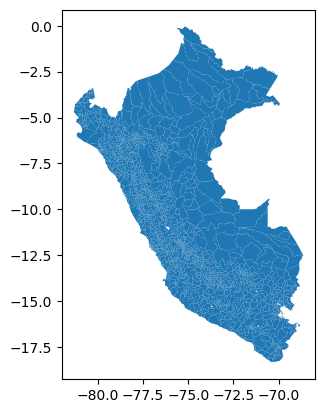

In [ ]:
#Peru's districs plot
peru.plot()
plt.show()

In [ ]:
#DataFrame Peru's districts
peru.head()

,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,Shape_STAr,Shape_STLe,Shape_Leng,Shape_Area,geometry
0,1,15,LIMA,01,LIMA,38,SANTA MARIA DEL MAR,150138,1501,0.000649,0.156101,0.156101,0.000649,"MULTIPOLYGON (((-76.78182 -12.40919, -76.78173..."
1,2,15,LIMA,05,CAÑETE,05,CHILCA,150505,1505,0.040063,1.154549,1.154549,0.040063,"POLYGON ((-76.55171 -12.28024, -76.55021 -12.2..."
2,3,15,LIMA,01,LIMA,19,LURIN,150119,1501,0.015603,0.825145,0.820880,0.015595,"MULTIPOLYGON (((-76.70549 -12.17672, -76.70429..."
3,4,15,LIMA,01,LIMA,24,PUCUSANA,150124,1501,0.002562,0.437869,0.437869,0.002562,"MULTIPOLYGON (((-76.77367 -12.42553, -76.77332..."
4,5,15,LIMA,01,LIMA,26,PUNTA HERMOSA,150126,1501,0.010145,0.607714,0.607714,0.010145,"MULTIPOLYGON (((-76.65645 -12.18799, -76.65559..."


# 3. NC Cleaning

## Precipitation

In [ ]:
# Select variable 'pre' (precipitation) from NC file
precipitacion = data['pre']

In [ ]:
from datetime import datetime, timedelta

#Function to annualize monthly data between year1 and year2
def anualizar(dato,year1,year2):
  for year in range(year1,year2+1):
    temporal1 = dato.sel(time=slice(datetime(year,1,1), datetime(year,12,31)))
    if year == year1:
      temporal2 = np.nanmean(temporal1, axis=0)
    else:
      temporal2 = np.concatenate((temporal2, np.nanmean(temporal1, axis=0)), axis=0)
  temporal2 = temporal2.reshape(year2-year1+1,360,720)
  return(temporal2)

In [ ]:
# Select precipitation data from 1958 to 2007: 50 years
data_periodo50year = anualizar(precipitacion,1958,2007)

# Grid mean of precipitation along 50 years
promedio_50year = np.nanmean(data_periodo50year, axis=0)

<ipython-input-21-79490f534c86>:8: RuntimeWarning: Mean of empty slice
  temporal2 = np.nanmean(temporal1, axis=0)
<ipython-input-21-79490f534c86>:10: RuntimeWarning: Mean of empty slice
  temporal2 = np.concatenate((temporal2, np.nanmean(temporal1, axis=0)), axis=0)
<ipython-input-21-79490f534c86>:10: RuntimeWarning: Mean of empty slice
  temporal2 = np.concatenate((temporal2, np.nanmean(temporal1, axis=0)), axis=0)
<ipython-input-21-79490f534c86>:10: RuntimeWarning: Mean of empty slice
  temporal2 = np.concatenate((temporal2, np.nanmean(temporal1, axis=0)), axis=0)
<ipython-input-21-79490f534c86>:10: RuntimeWarning: Mean of empty slice
  temporal2 = np.concatenate((temporal2, np.nanmean(temporal1, axis=0)), axis=0)
<ipython-input-23-3ad42d952de3>:5: RuntimeWarning: Mean of empty slice
  promedio_50year = np.nanmean(data_periodo50year, axis=0)


In [ ]:
# Select the corresponding data for each year from 2008 to 2016
data_2008 = precipitacion.sel(time=slice('2008-01-01', '2008-12-31'))
data_2009 = precipitacion.sel(time=slice('2009-01-01', '2009-12-31'))
data_2010 = precipitacion.sel(time=slice('2010-01-01', '2010-12-31'))
data_2011 = precipitacion.sel(time=slice('2011-01-01', '2011-12-31'))
data_2012 = precipitacion.sel(time=slice('2012-01-01', '2012-12-31'))
data_2013 = precipitacion.sel(time=slice('2013-01-01', '2013-12-31'))
data_2014 = precipitacion.sel(time=slice('2014-01-01', '2014-12-31'))
data_2015 = precipitacion.sel(time=slice('2015-01-01', '2015-12-31'))
data_2016 = precipitacion.sel(time=slice('2016-01-01', '2016-12-31'))

In [ ]:
#Grid mean of 'pre' variable along 50 years
#promedio_50year = np.nanmean(data_periodo50year, axis=0)

# Calculate the standard deviation of each grid of precipitation for 50 years
std_50year = np.nanstd(data_periodo50year, axis=0)

<ipython-input-25-5a4f752637db>:2: RuntimeWarning: Mean of empty slice
  promedio_50year = np.nanmean(data_periodo50year, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [ ]:
# Annual average annual precipitation
prep2008 = np.nanmean(data_2008, axis=0)
prep2009 = np.nanmean(data_2009, axis=0)
prep2010 = np.nanmean(data_2010, axis=0)
prep2011 = np.nanmean(data_2011, axis=0)
prep2012 = np.nanmean(data_2012, axis=0)
prep2013 = np.nanmean(data_2013, axis=0)
prep2014 = np.nanmean(data_2014, axis=0)
prep2015 = np.nanmean(data_2015, axis=0)
prep2016 = np.nanmean(data_2016, axis=0)

<ipython-input-27-b695a37f6e43>:2: RuntimeWarning: Mean of empty slice
  prep2008 = np.nanmean(data_2008, axis=0)
<ipython-input-27-b695a37f6e43>:3: RuntimeWarning: Mean of empty slice
  prep2009 = np.nanmean(data_2009, axis=0)
<ipython-input-27-b695a37f6e43>:4: RuntimeWarning: Mean of empty slice
  prep2010 = np.nanmean(data_2010, axis=0)
<ipython-input-27-b695a37f6e43>:5: RuntimeWarning: Mean of empty slice
  prep2011 = np.nanmean(data_2011, axis=0)
<ipython-input-27-b695a37f6e43>:6: RuntimeWarning: Mean of empty slice
  prep2012 = np.nanmean(data_2012, axis=0)
<ipython-input-27-b695a37f6e43>:7: RuntimeWarning: Mean of empty slice
  prep2013 = np.nanmean(data_2013, axis=0)
<ipython-input-27-b695a37f6e43>:9: RuntimeWarning: Mean of empty slice
  prep2015 = np.nanmean(data_2015, axis=0)
<ipython-input-27-b695a37f6e43>:10: RuntimeWarning: Mean of empty slice
  prep2016 = np.nanmean(data_2016, axis=0)


In [ ]:
# variations of annual averages 2008-2016
variacion2008 = prep2008 - promedio_50year
variacion2009 = prep2009 - promedio_50year
variacion2010 = prep2010 - promedio_50year
variacion2011 = prep2011 - promedio_50year
variacion2012 = prep2012 - promedio_50year
variacion2013 = prep2013 - promedio_50year
variacion2014 = prep2014 - promedio_50year
variacion2015 = prep2015 - promedio_50year
variacion2016 = prep2016 - promedio_50year

In [ ]:
# Convert rainfall to standard deviation
estand2008 = (prep2008 - promedio_50year)/std_50year
estand2009 = (prep2009 - promedio_50year)/std_50year
estand2010 = (prep2010 - promedio_50year)/std_50year
estand2011 = (prep2011 - promedio_50year)/std_50year
estand2012 = (prep2012 - promedio_50year)/std_50year
estand2013 = (prep2013 - promedio_50year)/std_50year
estand2014 = (prep2014 - promedio_50year)/std_50year
estand2015 = (prep2015 - promedio_50year)/std_50year
estand2016 = (prep2016 - promedio_50year)/std_50year

<ipython-input-29-a09e9b24b754>:2: RuntimeWarning: invalid value encountered in true_divide
  estand2008 = (prep2008 - promedio_50year)/std_50year
<ipython-input-29-a09e9b24b754>:3: RuntimeWarning: invalid value encountered in true_divide
  estand2009 = (prep2009 - promedio_50year)/std_50year
<ipython-input-29-a09e9b24b754>:4: RuntimeWarning: invalid value encountered in true_divide
  estand2010 = (prep2010 - promedio_50year)/std_50year
<ipython-input-29-a09e9b24b754>:5: RuntimeWarning: invalid value encountered in true_divide
  estand2011 = (prep2011 - promedio_50year)/std_50year
<ipython-input-29-a09e9b24b754>:6: RuntimeWarning: invalid value encountered in true_divide
  estand2012 = (prep2012 - promedio_50year)/std_50year
<ipython-input-29-a09e9b24b754>:7: RuntimeWarning: invalid value encountered in true_divide
  estand2013 = (prep2013 - promedio_50year)/std_50year
<ipython-input-29-a09e9b24b754>:8: RuntimeWarning: invalid value encountered in true_divide
  estand2014 = (prep2014 -

## Temperature

In [ ]:
# Select variable 'tmp' (temperature) from NC file
temperatura = data1['tmp']

In [ ]:
# Select temperature data from 1958 to 2007: 50 years
data_periodo50year_temp = anualizar(temperatura,1958,2007)

# Grid mean of temperature along 50 years
promedio_50year_temp = np.nanmean(data_periodo50year_temp, axis=0)

# Calculate the standard deviation of each grid of temperature for 50 years
std_50year_temp = np.nanstd(data_periodo50year_temp, axis=0)

<ipython-input-21-79490f534c86>:8: RuntimeWarning: Mean of empty slice
  temporal2 = np.nanmean(temporal1, axis=0)
<ipython-input-21-79490f534c86>:10: RuntimeWarning: Mean of empty slice
  temporal2 = np.concatenate((temporal2, np.nanmean(temporal1, axis=0)), axis=0)
<ipython-input-31-af70c555e8c8>:5: RuntimeWarning: Mean of empty slice
  promedio_50year_temp = np.nanmean(data_periodo50year_temp, axis=0)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [ ]:
# Select the corresponding data for each year from 2008 to 2016
data_2008_temp = temperatura.sel(time=slice('2008-01-01', '2008-12-31'))
data_2009_temp = temperatura.sel(time=slice('2009-01-01', '2009-12-31'))
data_2010_temp = temperatura.sel(time=slice('2010-01-01', '2010-12-31'))
data_2011_temp = temperatura.sel(time=slice('2011-01-01', '2011-12-31'))
data_2012_temp = temperatura.sel(time=slice('2012-01-01', '2012-12-31'))
data_2013_temp = temperatura.sel(time=slice('2013-01-01', '2013-12-31'))
data_2014_temp = temperatura.sel(time=slice('2014-01-01', '2014-12-31'))
data_2015_temp = temperatura.sel(time=slice('2015-01-01', '2015-12-31'))
data_2016_temp = temperatura.sel(time=slice('2016-01-01', '2016-12-31'))

In [ ]:
# Annual average temperature
tmp2008 = np.nanmean(data_2008_temp, axis=0)
tmp2009 = np.nanmean(data_2009_temp, axis=0)
tmp2010 = np.nanmean(data_2010_temp, axis=0)
tmp2011 = np.nanmean(data_2011_temp, axis=0)
tmp2012 = np.nanmean(data_2012_temp, axis=0)
tmp2013 = np.nanmean(data_2013_temp, axis=0)
tmp2014 = np.nanmean(data_2014_temp, axis=0)
tmp2015 = np.nanmean(data_2015_temp, axis=0)
tmp2016 = np.nanmean(data_2016_temp, axis=0)

<ipython-input-33-40c6028c8ef5>:2: RuntimeWarning: Mean of empty slice
  tmp2008 = np.nanmean(data_2008_temp, axis=0)
<ipython-input-33-40c6028c8ef5>:3: RuntimeWarning: Mean of empty slice
  tmp2009 = np.nanmean(data_2009_temp, axis=0)
<ipython-input-33-40c6028c8ef5>:4: RuntimeWarning: Mean of empty slice
  tmp2010 = np.nanmean(data_2010_temp, axis=0)
<ipython-input-33-40c6028c8ef5>:5: RuntimeWarning: Mean of empty slice
  tmp2011 = np.nanmean(data_2011_temp, axis=0)
<ipython-input-33-40c6028c8ef5>:6: RuntimeWarning: Mean of empty slice
  tmp2012 = np.nanmean(data_2012_temp, axis=0)
<ipython-input-33-40c6028c8ef5>:7: RuntimeWarning: Mean of empty slice
  tmp2013 = np.nanmean(data_2013_temp, axis=0)
<ipython-input-33-40c6028c8ef5>:8: RuntimeWarning: Mean of empty slice
  tmp2014 = np.nanmean(data_2014_temp, axis=0)
<ipython-input-33-40c6028c8ef5>:9: RuntimeWarning: Mean of empty slice
  tmp2015 = np.nanmean(data_2015_temp, axis=0)
<ipython-input-33-40c6028c8ef5>:10: RuntimeWarning: Mean

In [ ]:
# variations of annual averages 2008-2016
variacion2008_tmp = tmp2008 - promedio_50year_temp
variacion2009_tmp = tmp2009 - promedio_50year_temp
variacion2010_tmp = tmp2010 - promedio_50year_temp
variacion2011_tmp = tmp2011 - promedio_50year_temp
variacion2012_tmp = tmp2012 - promedio_50year_temp
variacion2013_tmp = tmp2013 - promedio_50year_temp
variacion2014_tmp = tmp2014 - promedio_50year_temp
variacion2015_tmp = tmp2015 - promedio_50year_temp
variacion2016_tmp = tmp2016 - promedio_50year_temp

In [ ]:
# Convert temperature to standard deviation
estand2008_tmp = (tmp2008 - promedio_50year_temp)/std_50year_temp
estand2009_tmp = (tmp2009 - promedio_50year_temp)/std_50year_temp
estand2010_tmp = (tmp2010 - promedio_50year_temp)/std_50year_temp
estand2011_tmp = (tmp2011 - promedio_50year_temp)/std_50year_temp
estand2012_tmp = (tmp2012 - promedio_50year_temp)/std_50year_temp
estand2013_tmp = (tmp2013 - promedio_50year_temp)/std_50year_temp
estand2014_tmp = (tmp2014 - promedio_50year_temp)/std_50year_temp
estand2015_tmp = (tmp2015 - promedio_50year_temp)/std_50year_temp
estand2016_tmp = (tmp2016 - promedio_50year_temp)/std_50year_temp

# 4. DEFINE FUNCTIONS

Funciones
- arrayToPolygon(array)
- pre_distrito(shapefile_peru,gdf)

Function to convert an array of precipitation data to a Peru's shapefile

In [ ]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon

# Function to convert an array to a shapefile
def arrayToPolygon(array):
  # Definir latitud y longitud PARA PERU
  lats = np.arange(-19.5, 0.2, 0.5)
  lons = np.arange(-81.5, -67.9, 0.5)

  #array de datos de peru
  array = array[141:181,197:225]

  # Lista para almacenar polígonos
  polygons = []

  # Bucle para crear cada poligono
  for i in range(len(lats)-1):
    for j in range(len(lons)-1):
        # Crear coordenadas
        coords = [(lons[j], lats[i]), (lons[j+1], lats[i]),
                  (lons[j+1], lats[i+1]), (lons[j], lats[i+1])]
        # Crear un polígono a partir de las coordenadas
        poly = Polygon(coords)
        # Agregar el polígono a la lista
        polygons.append(poly)

        if j == len(lons)-2:
          coords = [(lons[j]+0.5, lats[i]), (lons[j+1]+0.5, lats[i]),
                  (lons[j+1]+0.5, lats[i+1]), (lons[j]+0.5, lats[i+1])]

          poly = Polygon(coords)
          polygons.append(poly)

  for j in range(len(lons)-1):
    # Obtener las coordenadas
    coords = [(lons[j], lats[i]), (lons[j+1], lats[i]),
            (lons[j+1], lats[i+1]), (lons[j], lats[i+1])]
    # Crear un polígono a partir de las coordenadas
    poly = Polygon(coords)
    # Agregar el polígono a la lista
    polygons.append(poly)

    if j == len(lons)-2:
      coords = [(lons[j]+0.5, 89.5), (lons[j+1]+0.5, 89.5),
              (lons[j+1]+0.5, 90), (lons[j]+0.5, 90)]

      poly = Polygon(coords)
      polygons.append(poly)

  # Crear GeoDataFrame con los polígonos y los valores de precipitación
  gdf = gpd.GeoDataFrame({'precip': array.flatten(), 'geometry': polygons})
  gdf.crs = "EPSG:4326"

  return(gdf)

Function to convert an array of temperature data to a Peru's shapefile

In [ ]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon

# Function to convert an array to a shapefile
def arrayToPolygon_temp(array):

  # Definir latitud y longitud PARA PERU
  lats = np.arange(-19.5, 0.2, 0.5)
  lons = np.arange(-81.5, -67.9, 0.5)

  #array de datos de peru
  array = array[141:181,197:225]

  # Lista para almacenar los polígonos
  polygons = []

  # Bucle para crear cada poligono
  for i in range(len(lats)-1):
    for j in range(len(lons)-1):
        # Obtener las coordenadas
        coords = [(lons[j], lats[i]), (lons[j+1], lats[i]),
                  (lons[j+1], lats[i+1]), (lons[j], lats[i+1])]
        # Crear un polígono a partir de las coordenadas
        poly = Polygon(coords)
        # Agregar el polígono a la lista
        polygons.append(poly)

        if j == len(lons)-2:
          coords = [(lons[j]+0.5, lats[i]), (lons[j+1]+0.5, lats[i]),
                  (lons[j+1]+0.5, lats[i+1]), (lons[j]+0.5, lats[i+1])]

          poly = Polygon(coords)
          polygons.append(poly)

  for j in range(len(lons)-1):
    # Obtener las coordenadas
    coords = [(lons[j], lats[i]), (lons[j+1], lats[i]),
            (lons[j+1], lats[i+1]), (lons[j], lats[i+1])]
    # Crear un polígono a partir de las coordenadas
    poly = Polygon(coords)
    # Agregar el polígono a la lista
    polygons.append(poly)

    if j == len(lons)-2:
      coords = [(lons[j]+0.5, 89.5), (lons[j+1]+0.5, 89.5),
              (lons[j+1]+0.5, 90), (lons[j]+0.5, 90)]

      poly = Polygon(coords)
      polygons.append(poly)

  # Crear un GeoDataFrame con los polígonos y los valores de temperatura
  gdf = gpd.GeoDataFrame({'tmp': array.flatten(), 'geometry': polygons})
  gdf.crs = "EPSG:4326"

  return(gdf)

Function to join precipitation data from GeoDataFrame and Shapefile

In [ ]:
import geopandas as gpd
from shapely.geometry import MultiPolygon

def pre_distrito(shapefile_peru,gdf):

  interseccion = gpd.overlay(shapefile_peru, gdf, how='intersection')
  interseccion['area_interseccion'] = interseccion['geometry'].area
  interseccion['precip_por_area'] = interseccion['precip'] * interseccion['area_interseccion']
  suma_area_precip = interseccion.groupby('UBIGEO')['precip_por_area'].sum()
  suma_area = interseccion.groupby('UBIGEO')['area_interseccion'].sum()
  precip_prom_pond = suma_area_precip / suma_area

  precip_prom_pond = pd.DataFrame(precip_prom_pond)
  df_merge = pd.merge(shapefile_peru, precip_prom_pond, on='UBIGEO', how='inner')
  df_merge = df_merge.rename(columns={0: 'precip'})

  return(df_merge)

Function to join temperature data from GeoDataFrame and Shapefile

In [ ]:
import geopandas as gpd
from shapely.geometry import MultiPolygon

def tmp_distrito(shapefile_peru,gdf):

  interseccion = gpd.overlay(shapefile_peru, gdf, how='intersection')
  interseccion['area_interseccion'] = interseccion['geometry'].area
  interseccion['tmp_por_area'] = interseccion['tmp'] * interseccion['area_interseccion']
  suma_area_tmp = interseccion.groupby('UBIGEO')['tmp_por_area'].sum()
  suma_area = interseccion.groupby('UBIGEO')['area_interseccion'].sum()
  tmp_prom_pond = suma_area_tmp / suma_area

  tmp_prom_pond = pd.DataFrame(tmp_prom_pond)
  df_merge = pd.merge(shapefile_peru, tmp_prom_pond, on='UBIGEO', how='inner')
  df_merge = df_merge.rename(columns={0: 'tmp'})

  return(df_merge)

# 5. Calculations of district's precipitation and temperature yearly

## PRECIP

In [ ]:
#Run functions
data_precipitacion2008 = pre_distrito(peru,arrayToPolygon(estand2008))
data_precipitacion2009 = pre_distrito(peru,arrayToPolygon(estand2009))
data_precipitacion2010 = pre_distrito(peru,arrayToPolygon(estand2010))
data_precipitacion2011 = pre_distrito(peru,arrayToPolygon(estand2011))
data_precipitacion2012 = pre_distrito(peru,arrayToPolygon(estand2012))
data_precipitacion2013 = pre_distrito(peru,arrayToPolygon(estand2013))
data_precipitacion2014 = pre_distrito(peru,arrayToPolygon(estand2014))
data_precipitacion2015 = pre_distrito(peru,arrayToPolygon(estand2015))
data_precipitacion2016 = pre_distrito(peru,arrayToPolygon(estand2016))

<ipython-input-38-c5f2ca02aa14>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  interseccion['area_interseccion'] = interseccion['geometry'].area
<ipython-input-38-c5f2ca02aa14>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  interseccion['area_interseccion'] = interseccion['geometry'].area
<ipython-input-38-c5f2ca02aa14>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  interseccion['area_interseccion'] = interseccion['geometry'].area
<ipython-input-38-c5f2ca02aa14>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' 

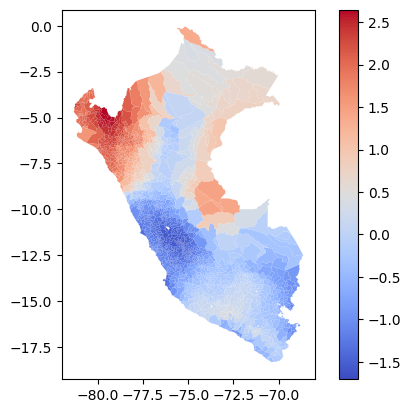

In [ ]:
#Plot 2008's precipitation
fig, ax = plt.subplots()
data_precipitacion2008.plot(ax=ax,column='precip', cmap='coolwarm', legend=True)
plt.show()

In [ ]:
#Drop variables from DataFrame
data_precipitacion2008 = data_precipitacion2008.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_precipitacion2009 = data_precipitacion2009.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_precipitacion2010 = data_precipitacion2010.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_precipitacion2011 = data_precipitacion2011.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_precipitacion2012 = data_precipitacion2012.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_precipitacion2013 = data_precipitacion2013.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_precipitacion2014 = data_precipitacion2014.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_precipitacion2015 = data_precipitacion2015.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_precipitacion2016 = data_precipitacion2016.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)

In [ ]:
#Export precipitation data to excel
data_precipitacion2008.to_excel('pre2008.xlsx', index=False)
data_precipitacion2009.to_excel('pre2009.xlsx', index=False)
data_precipitacion2010.to_excel('pre2010.xlsx', index=False)
data_precipitacion2011.to_excel('pre2011.xlsx', index=False)
data_precipitacion2012.to_excel('pre2012.xlsx', index=False)
data_precipitacion2013.to_excel('pre2013.xlsx', index=False)
data_precipitacion2014.to_excel('pre2014.xlsx', index=False)
data_precipitacion2015.to_excel('pre2015.xlsx', index=False)
data_precipitacion2016.to_excel('pre2016.xlsx', index=False)

## TMP

In [ ]:
#Run functions
data_temp2008 = tmp_distrito(peru,arrayToPolygon_temp(estand2008_tmp))
data_temp2009 = tmp_distrito(peru,arrayToPolygon_temp(estand2009_tmp))
data_temp2010 = tmp_distrito(peru,arrayToPolygon_temp(estand2010_tmp))
data_temp2011 = tmp_distrito(peru,arrayToPolygon_temp(estand2011_tmp))
data_temp2012 = tmp_distrito(peru,arrayToPolygon_temp(estand2012_tmp))
data_temp2013 = tmp_distrito(peru,arrayToPolygon_temp(estand2013_tmp))
data_temp2014 = tmp_distrito(peru,arrayToPolygon_temp(estand2014_tmp))
data_temp2015 = tmp_distrito(peru,arrayToPolygon_temp(estand2015_tmp))
data_temp2016 = tmp_distrito(peru,arrayToPolygon_temp(estand2016_tmp))

<ipython-input-39-afbc3880c76d>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  interseccion['area_interseccion'] = interseccion['geometry'].area
<ipython-input-39-afbc3880c76d>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  interseccion['area_interseccion'] = interseccion['geometry'].area
<ipython-input-39-afbc3880c76d>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  interseccion['area_interseccion'] = interseccion['geometry'].area
<ipython-input-39-afbc3880c76d>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' 

In [ ]:
# Drop variables from DataFrame
data_temp2008 = data_temp2008.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_temp2009 = data_temp2009.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_temp2010 = data_temp2010.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_temp2011 = data_temp2011.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_temp2012 = data_temp2012.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_temp2013 = data_temp2013.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_temp2014 = data_temp2014.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_temp2015 = data_temp2015.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)
data_temp2016 = data_temp2016.drop(['Shape_STAr', 'Shape_STLe','Shape_Leng','Shape_Area','geometry','OBJECTID_1','CCDD','CCPP','CCDI','IDPROV'], axis=1)

In [ ]:
#Export temperature data to excel
data_temp2008.to_excel('tmp2008.xlsx', index=False)
data_temp2009.to_excel('tmp2009.xlsx', index=False)
data_temp2010.to_excel('tmp2010.xlsx', index=False)
data_temp2011.to_excel('tmp2011.xlsx', index=False)
data_temp2012.to_excel('tmp2012.xlsx', index=False)
data_temp2013.to_excel('tmp2013.xlsx', index=False)
data_temp2014.to_excel('tmp2014.xlsx', index=False)
data_temp2015.to_excel('tmp2015.xlsx', index=False)
data_temp2016.to_excel('tmp2016.xlsx', index=False)

In [ ]:
data_temp2016

,NOMBDEP,NOMBPROV,NOMBDIST,UBIGEO,tmp
0,LIMA,LIMA,SANTA MARIA DEL MAR,150138,1.538141
1,LIMA,CAÑETE,CHILCA,150505,1.543766
2,LIMA,LIMA,LURIN,150119,1.538141
3,LIMA,LIMA,PUCUSANA,150124,1.539951
4,LIMA,LIMA,PUNTA HERMOSA,150126,1.538141
...,...,...,...,...,...
1869,PIURA,TALARA,PARIÑAS,200701,1.528731
1870,PIURA,SULLANA,BELLAVISTA,200602,1.560122
1871,PIURA,PIURA,VEINTISEIS DE OCTUBRE,200115,1.539630
1872,HUANUCO,LEONCIO PRADO,CASTILLO GRANDE,100608,1.831550


# OTRO CODIGO: PRUEBA, ETC

## xarray to raster

In [ ]:
'''#funcion para pasar de array a xarray con coordenadas
def arrayToXarray(dato):
  lon = np.arange(-179.75, 180, 0.5)
  #lat = np.arange(89.75, -90, -0.5)
  lat = np.arange(-89.75, 90, 0.5)
  asd1 = np.nan_to_num(dato, nan=-999)
  asd1 = dato[::-1]
  asd1 = xr.DataArray(asd1, dims=['lat', 'lon'], coords={'lat': lat, 'lon': lon}, name='pre')
  #asd1.lat.attrs['units'] = 'degrees_north'
  #asd1.lon.attrs['units'] = 'degrees_east'
  return(asd1)
  '''

In [ ]:
'''
xarray_prueba = arrayToXarray(estand2016)
xarray_prueba
'''

<xarray.DataArray 'pre' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8

prueba

In [ ]:
'''
import rasterio

# Definir el perfil del raster
profile = {
    "driver": "GTiff",
    "dtype": xarray_prueba.dtype,
    "width": xarray_prueba.shape[1],
    "height": xarray_prueba.shape[0],
    "count": 1,
    "crs": 'EPSG:4326',
    "transform": rasterio.Affine(0.5,0,-180,0,-0.5,90)
}
# Crear el archivo raster
with rasterio.open("raster_prueba.tif", "w", **profile) as dst:
    dst.write(xarray_prueba.values, 1)
'''

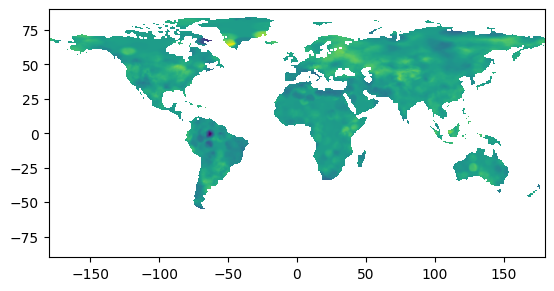

In [ ]:
'''raster_prueba = rasterio.open('raster_prueba.tif')

from rasterio.plot import show
fig, ax = plt.subplots()
show(raster_prueba, ax=ax)
plt.show()
'''

In [ ]:
'''raster_prueba.transform
'''

Affine(0.5, 0.0, -180.0,
       0.0, -0.5, 90.0)

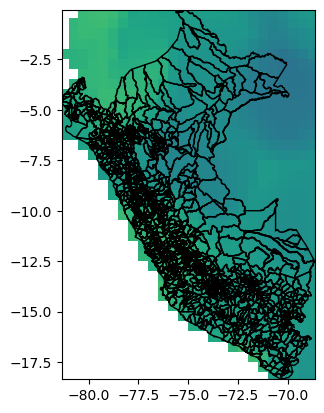

In [ ]:
'''raster_prueba = rasterio.open('raster_prueba.tif')

xmin, ymin, xmax, ymax = peru.geometry.bounds.minx.min(), peru.geometry.bounds.miny.min(), peru.geometry.bounds.maxx.max(), peru.geometry.bounds.maxy.max()

from rasterio.plot import show

fig, ax = plt.subplots()
show(raster_prueba, ax=ax)
peru.plot(ax=ax,facecolor='none')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Mostrar la figura resultante
plt.show()
'''

## otro prueba

In [ ]:
'''import rasterio
import geopandas as gpd
from rasterstats import zonal_stats
from rasterio.features import shapes
import fiona
'''

In [ ]:
'''
#peru = gpd.read_file('/content/DISTRITOS.shp')
with rasterio.open('/content/raster_prueba.tif') as src:
    precip = src.read(1)
    #precip = np.nan_to_num(precip, nan=-999)
    transform = src.transform
    nodata_mask = src.read_masks(1)
'''

In [ ]:
'''
shapes = rasterio.features.shapes(precip, mask=nodata_mask, transform=transform)
schema = {'geometry': 'Polygon', 'properties': {'value': 'float'}}
with fiona.open('prueba.shp', 'w', 'ESRI Shapefile', schema) as shp:
    for shape, value in shapes:
        shp.write({'geometry': shape, 'properties': {'value': value}})
'''

In [ ]:
'''
shapes = rasterio.features.shapes(precip, transform=transform)
newlist = []
for shape, value in shapes:
  newlist.extend([shape, value])
'''

In [ ]:
#len(newlist)

134990

In [ ]:
#nuevaprueba = gpd.read_file('prueba.shp')

In [ ]:
#nuevaprueba

In [ ]:
#nuevaprueba.plot()
#plt.show()

In [ ]:
#stats = zonal_stats(peru.geometry, precip, affine=src.transform, stats=['mean'], nodata=-999)
#peru['precip_prom_pond'] = [s['mean'] for s in stats]

In [ ]:
#peru['precip_prom_pond'].dropna()

## array to raster

In [ ]:
'''import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon

# Definir los arreglos de latitud, longitud y precipitación
lats = np.arange(-90, 90, 0.5)
lons = np.arange(-180, 180, 0.5)
#precip = np.random.rand(len(lats), len(lons))

# Crear una lista para almacenar los polígonos
polygons = []

# Recorrer cada celda de la matriz de precipitación
for i in range(len(lats)-1):
    for j in range(len(lons)-1):
        # Obtener las coordenadas de las esquinas de la celda
        coords = [(lons[j], lats[i]), (lons[j+1], lats[i]),
                  (lons[j+1], lats[i+1]), (lons[j], lats[i+1])]
        # Crear un polígono a partir de las coordenadas
        poly = Polygon(coords)
        # Agregar el polígono a la lista
        polygons.append(poly)

        if j == len(lons)-2:
          coords = [(lons[j]+0.5, lats[i]), (lons[j+1]+0.5, lats[i]),
                  (lons[j+1]+0.5, lats[i+1]), (lons[j]+0.5, lats[i+1])]

          poly = Polygon(coords)
          polygons.append(poly)

for j in range(len(lons)-1):
  # Obtener las coordenadas de las esquinas de la celda
  coords = [(lons[j], lats[i]), (lons[j+1], lats[i]),
            (lons[j+1], lats[i+1]), (lons[j], lats[i+1])]
  # Crear un polígono a partir de las coordenadas
  poly = Polygon(coords)
  # Agregar el polígono a la lista
  polygons.append(poly)

  if j == len(lons)-2:
    coords = [(lons[j]+0.5, 89.5), (lons[j+1]+0.5, 89.5),
              (lons[j+1]+0.5, 90), (lons[j]+0.5, 90)]

    poly = Polygon(coords)
    polygons.append(poly)

# Crear un GeoDataFrame con los polígonos y los valores de precipitación
gdf = gpd.GeoDataFrame({'precip': estand2008.flatten(), 'geometry': polygons})
'''

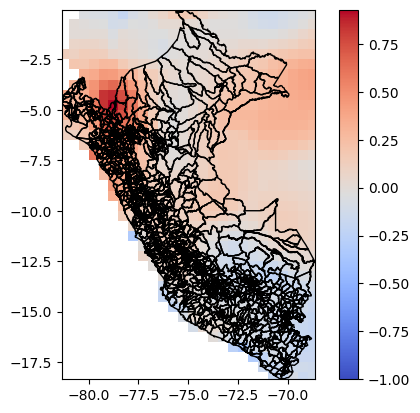

In [ ]:
'''
xmin, ymin, xmax, ymax = peru.geometry.bounds.minx.min(), peru.geometry.bounds.miny.min(), peru.geometry.bounds.maxx.max(), peru.geometry.bounds.maxy.max()


fig, ax = plt.subplots()
gdf.loc[~gdf.precip.isna()].plot(ax=ax,column='precip', cmap='coolwarm', legend=True)
peru.plot(ax=ax,facecolor='none')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.show()
'''

In [ ]:
#gdf.loc[~gdf.precip.isna()]

## COMPLETADO: DATOS DE PRECIPITACION POR DISTRITO

Array to raster en las grillas donde esta Peru
- Lat: -19° a 0°
- Lon: -81.5° a -68°

### PRUEBA

In [ ]:
'''
#Indices PERU
indices_lat = np.where(np.isin(lats, lats1))
indices_lon = np.where(np.isin(lons, lons1))
indices_lat, indices_lon
'''

In [ ]:
'''
#array de datos de peru
new_peru = estand2008[141:181,197:225]
'''

In [ ]:
'''
len(lats)
'''

360

In [ ]:
'''
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon

# Definir los arreglos de latitud, longitud PARA PERU
lats = np.arange(-19.5, 0.2, 0.5)
lons = np.arange(-81.5, -67.9, 0.5)
        #OK

# Crear una lista para almacenar los polígonos
polygons = []

# Recorrer cada celda de la matriz de precipitación
for i in range(len(lats)-1):
    for j in range(len(lons)-1):
        # Obtener las coordenadas de las esquinas de la celda
        coords = [(lons[j], lats[i]), (lons[j+1], lats[i]),
                  (lons[j+1], lats[i+1]), (lons[j], lats[i+1])]
        # Crear un polígono a partir de las coordenadas
        poly = Polygon(coords)
        # Agregar el polígono a la lista
        polygons.append(poly)

        if j == len(lons)-2:
          coords = [(lons[j]+0.5, lats[i]), (lons[j+1]+0.5, lats[i]),
                  (lons[j+1]+0.5, lats[i+1]), (lons[j]+0.5, lats[i+1])]

          poly = Polygon(coords)
          polygons.append(poly)

for j in range(len(lons)-1):
  # Obtener las coordenadas de las esquinas de la celda
  coords = [(lons[j], lats[i]), (lons[j+1], lats[i]),
            (lons[j+1], lats[i+1]), (lons[j], lats[i+1])]
  # Crear un polígono a partir de las coordenadas
  poly = Polygon(coords)
  # Agregar el polígono a la lista
  polygons.append(poly)

  if j == len(lons)-2:
    coords = [(lons[j]+0.5, 89.5), (lons[j+1]+0.5, 89.5),
              (lons[j+1]+0.5, 90), (lons[j]+0.5, 90)]

    poly = Polygon(coords)
    polygons.append(poly)

# Crear un GeoDataFrame con los polígonos y los valores de precipitación
gdf1 = gpd.GeoDataFrame({'precip': new_peru.flatten(), 'geometry': polygons})

'''


In [ ]:
#shp_raster_peru = gdf1.loc[~gdf1.precip.isna()]

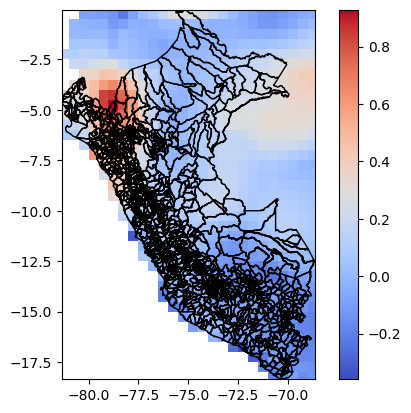

In [ ]:
'''
xmin, ymin, xmax, ymax = peru.geometry.bounds.minx.min(), peru.geometry.bounds.miny.min(), peru.geometry.bounds.maxx.max(), peru.geometry.bounds.maxy.max()


fig, ax = plt.subplots()
gdf1.loc[~gdf1.precip.isna()].plot(ax=ax,column='precip', cmap='coolwarm', legend=True)
peru.plot(ax=ax,facecolor='none')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.show()
'''

In [ ]:
#gdf1.crs = "EPSG:4326"

In [ ]:
#peru['Shape_Area'] = peru.geometry.area
#peru.head()
#import geopandas as gpd
#from shapely.geometry import MultiPolygon

In [ ]:
'''
intersecciones = gpd.sjoin(peru, gdf1, op='intersects')
intersecciones['Shape_Area'] = intersecciones['geometry'].area
intersecciones.sort_values(by='OBJECTID_1', ascending=True)
'''

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-237-3c53fa2780b1>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersecciones['Shape_Area'] = intersecciones['geometry'].area


,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,Shape_STAr,Shape_STLe,Shape_Leng,Shape_Area,geometry,index_right,precip
0,1,15,LIMA,01,LIMA,38,SANTA MARIA DEL MAR,150138,1501,0.000649,0.156101,0.156101,0.000649,"MULTIPOLYGON (((-76.78182 -12.40919, -76.78173...",401,0.019168
1,2,15,LIMA,05,CAÑETE,05,CHILCA,150505,1505,0.040063,1.154549,1.154549,0.040063,"POLYGON ((-76.55171 -12.28024, -76.55021 -12.2...",401,0.019168
1,2,15,LIMA,05,CAÑETE,05,CHILCA,150505,1505,0.040063,1.154549,1.154549,0.040063,"POLYGON ((-76.55171 -12.28024, -76.55021 -12.2...",373,-0.010240
1,2,15,LIMA,05,CAÑETE,05,CHILCA,150505,1505,0.040063,1.154549,1.154549,0.040063,"POLYGON ((-76.55171 -12.28024, -76.55021 -12.2...",402,0.102184
2,3,15,LIMA,01,LIMA,19,LURIN,150119,1501,0.015603,0.825145,0.820880,0.015595,"MULTIPOLYGON (((-76.70549 -12.17672, -76.70429...",401,0.019168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,1871,20,PIURA,06,SULLANA,02,BELLAVISTA,200602,2006,0.000189,0.061508,0.061508,0.000189,"POLYGON ((-80.66936 -4.88347, -80.66932 -4.883...",813,0.228269
1871,1872,20,PIURA,01,PIURA,15,VEINTISEIS DE OCTUBRE,200115,2001,0.005833,0.419652,0.419652,0.005833,"POLYGON ((-80.66118 -5.14968, -80.66102 -5.150...",785,0.313027
1872,1873,10,HUANUCO,06,LEONCIO PRADO,08,CASTILLO GRANDE,100608,1006,0.008583,0.533859,0.533859,0.008583,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",571,0.100761
1872,1873,10,HUANUCO,06,LEONCIO PRADO,08,CASTILLO GRANDE,100608,1006,0.008583,0.533859,0.533859,0.008583,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",570,0.113475


In [ ]:
'''
interseccion = gpd.overlay(peru, gdf1, how='intersection')
interseccion['area_interseccion'] = interseccion['geometry'].area
interseccion['precip_por_area'] = interseccion['precip'] * interseccion['area_interseccion']
suma_area_precip = interseccion.groupby('UBIGEO')['precip_por_area'].sum()
suma_area = interseccion.groupby('UBIGEO')['area_interseccion'].sum()
precip_prom_pond = suma_area_precip / suma_area

#interseccion.sort_values(by='OBJECTID_1', ascending=True)
'''

<ipython-input-261-2c7ce593f9ca>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  interseccion['area_interseccion'] = interseccion['geometry'].area


In [ ]:
'''
precip_prom_pond = pd.DataFrame(precip_prom_pond)
precip_prom_pond
'''

,0
UBIGEO,
010101,0.455944
010102,0.512990
010103,0.406607
010104,0.455944
010105,0.456329
...,...
250302,0.096852
250303,0.057777
250304,0.089388


In [ ]:
'''
precip_prom_pond = pd.DataFrame(precip_prom_pond)
precip_prom_pond = precip_prom_pond.rename(columns={'0': 'precip'})
'''

In [ ]:
#precip_prom_pond.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
#df_merge = pd.merge(peru, precip_prom_pond, on='UBIGEO', how='inner')
#df_merge = df_merge.rename(columns={0: 'precip'})

In [ ]:
#df_merge

,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,Shape_STAr,Shape_STLe,Shape_Leng,Shape_Area,geometry,precip
0,1,15,LIMA,01,LIMA,38,SANTA MARIA DEL MAR,150138,1501,0.000649,0.156101,0.156101,0.000649,"MULTIPOLYGON (((-76.78182 -12.40919, -76.78173...",0.019168
1,2,15,LIMA,05,CAÑETE,05,CHILCA,150505,1505,0.040063,1.154549,1.154549,0.040063,"POLYGON ((-76.55171 -12.28024, -76.55021 -12.2...",0.019246
2,3,15,LIMA,01,LIMA,19,LURIN,150119,1501,0.015603,0.825145,0.820880,0.015595,"MULTIPOLYGON (((-76.70549 -12.17672, -76.70429...",0.019168
3,4,15,LIMA,01,LIMA,24,PUCUSANA,150124,1501,0.002562,0.437869,0.437869,0.002562,"MULTIPOLYGON (((-76.77367 -12.42553, -76.77332...",0.017147
4,5,15,LIMA,01,LIMA,26,PUNTA HERMOSA,150126,1501,0.010145,0.607714,0.607714,0.010145,"MULTIPOLYGON (((-76.65645 -12.18799, -76.65559...",0.019168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1870,20,PIURA,07,TALARA,01,PARIÑAS,200701,2007,0.091179,1.664519,1.664519,0.091179,"POLYGON ((-80.89458 -4.31752, -80.89412 -4.318...",0.321600
1870,1871,20,PIURA,06,SULLANA,02,BELLAVISTA,200602,2006,0.000189,0.061508,0.061508,0.000189,"POLYGON ((-80.66936 -4.88347, -80.66932 -4.883...",0.228269
1871,1872,20,PIURA,01,PIURA,15,VEINTISEIS DE OCTUBRE,200115,2001,0.005833,0.419652,0.419652,0.005833,"POLYGON ((-80.66118 -5.14968, -80.66102 -5.150...",0.313027
1872,1873,10,HUANUCO,06,LEONCIO PRADO,08,CASTILLO GRANDE,100608,1006,0.008583,0.533859,0.533859,0.008583,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",0.113372


In [ ]:
#exportar a excel
#df_merge.to_excel('datos.xlsx', index=False)

otra prueba sobre empaquetar raster con GDAL

*   no codificable



fin

In [ ]:
'''
#generar el raster
import rioxarray as rxr
xarray_prueba = xarray_prueba.rio.set_spatial_dims(x_dim="lon", y_dim="lat")
xarray_prueba.rio.to_raster('raster_prueba.tif')
'''

In [ ]:
#raster_prueba = rxr.open_rasterio('raster_prueba.tif')

In [ ]:
#list(rasterio.Affine(0.5,0,-180,0,-0.5,-90))

[0.5, 0.0, -180.0, 0.0, -0.5, -90.0, 0.0, 0.0, 1.0]

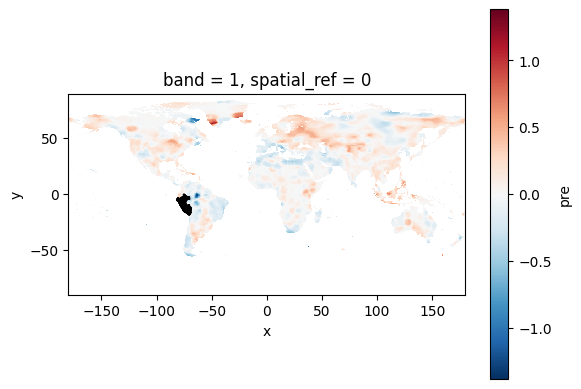

In [ ]:
'''
fig, ax= plt.subplots(1,1)
raster_prueba.plot(ax=ax)

peru.plot(ax=ax,facecolor='None')
plt.show()
'''

## Funcion Array to Xarray

In [ ]:
'''
#funcion para pasar de array a xarray con coordenadas
def arrayToXarray(dato):
  lon = np.arange(-179.75, 180, 0.5)
  lat = np.arange(-89.75, 90, 0.5)
  asd1 = xr.DataArray(dato, dims=['lat', 'lon'], coords={'lat': lat, 'lon': lon}, name='pre')
  return(asd1)
'''